In [2]:
import numpy as np

In [2]:
predicted_periods = np.load('./data/results/predicted_periods/predicted_periods_20250619-171443.npy', allow_pickle=True)
print(predicted_periods)

[list([np.int64(12150), np.int64(12200), np.int64(12200), np.int64(12250), np.int64(12300), np.int64(12350), np.int64(12400), np.int64(12400), np.int64(12450), np.int64(12500), np.int64(12550), np.int64(12600), np.int64(12600), np.int64(12650), np.int64(12700), np.int64(12750), np.int64(12800), np.int64(12800), np.int64(12850), np.int64(12900), np.int64(12950), np.int64(13000), np.int64(13000), np.int64(13050), np.int64(13100), np.int64(13150), np.int64(13200), np.int64(13200), np.int64(13250), np.int64(13300), np.int64(13350), np.int64(13400), np.int64(13400), np.int64(13450), np.int64(13500), np.int64(13550), np.int64(13600), np.int64(13600), np.int64(13650), np.int64(13700), np.int64(13750), np.int64(13800), np.int64(13800), np.int64(13850), np.int64(13900), np.int64(13950), np.int64(14000), np.int64(14000), np.int64(14050), np.int64(14100), np.int64(14150), np.int64(14200), np.int64(14200), np.int64(14250), np.int64(14300), np.int64(14350), np.int64(14400), np.int64(14450), np.int6

In [3]:
exp_data = np.load('./data/exp_data/exp_data_32.npy')

In [5]:
from imports.models import Denoise_Model
import torch

In [6]:
model = Denoise_Model().cuda()
model.load_state_dict(torch.load('./data/models/denoising_model.pt'))
model.eval()

Denoise_Model(
  (conv1d_1): Conv1d(2, 64, kernel_size=(4,), stride=(1,), padding=(2,))
  (maxpooling): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv1d_2): Conv1d(64, 64, kernel_size=(4,), stride=(1,), padding=(2,))
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (convTrans1d_3): ConvTranspose1d(64, 64, kernel_size=(4,), stride=(2,), padding=(1,))
  (bn3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (convTrans1d_4): ConvTranspose1d(64, 2, kernel_size=(4,), stride=(2,), padding=(1,))
  (leakyrelu): LeakyReLU(negative_slope=0.01)
)

In [10]:
input = torch.Tensor(np.stack([exp_data, exp_data])[np.newaxis, :, :])

In [29]:
with torch.no_grad():
    exp_data_deno = model(input)

In [31]:
exp_data_deno = exp_data_deno.cpu().numpy()[0, 0]

In [32]:
time_data = np.load('./data/time_data/time_data_32.npy')

Text(0, 0.5, 'Px')

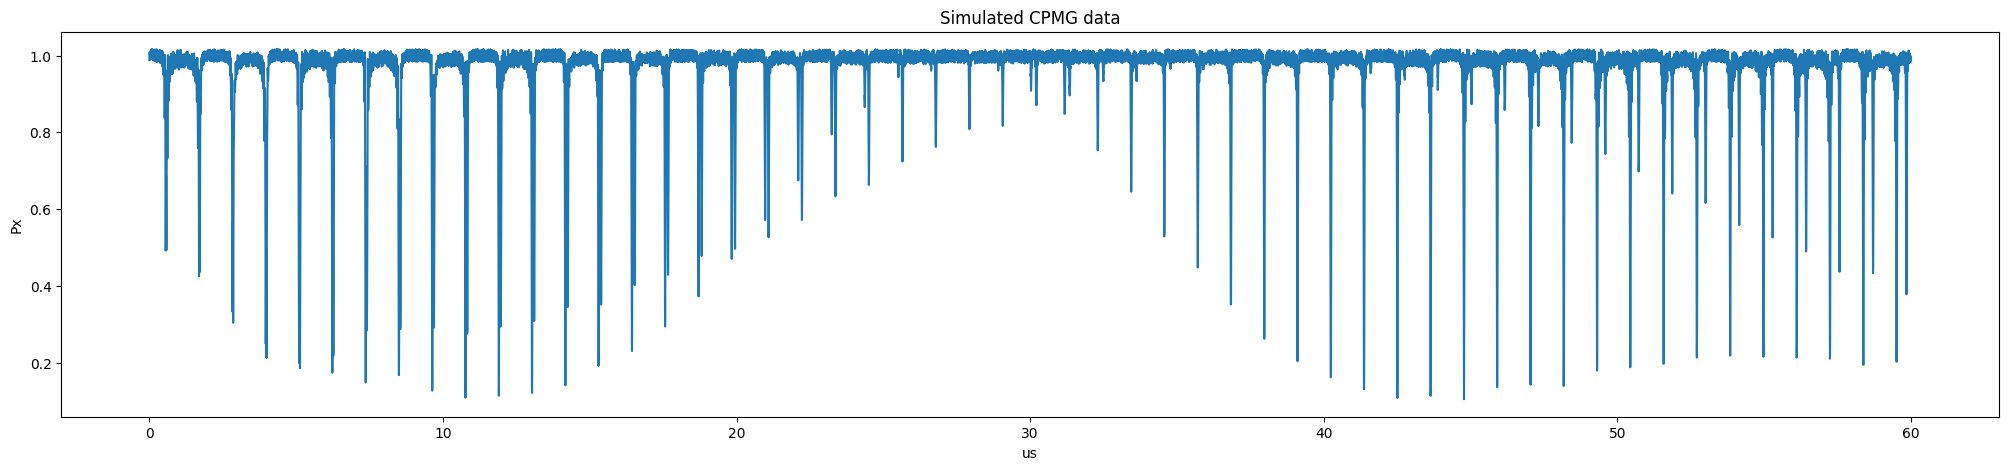

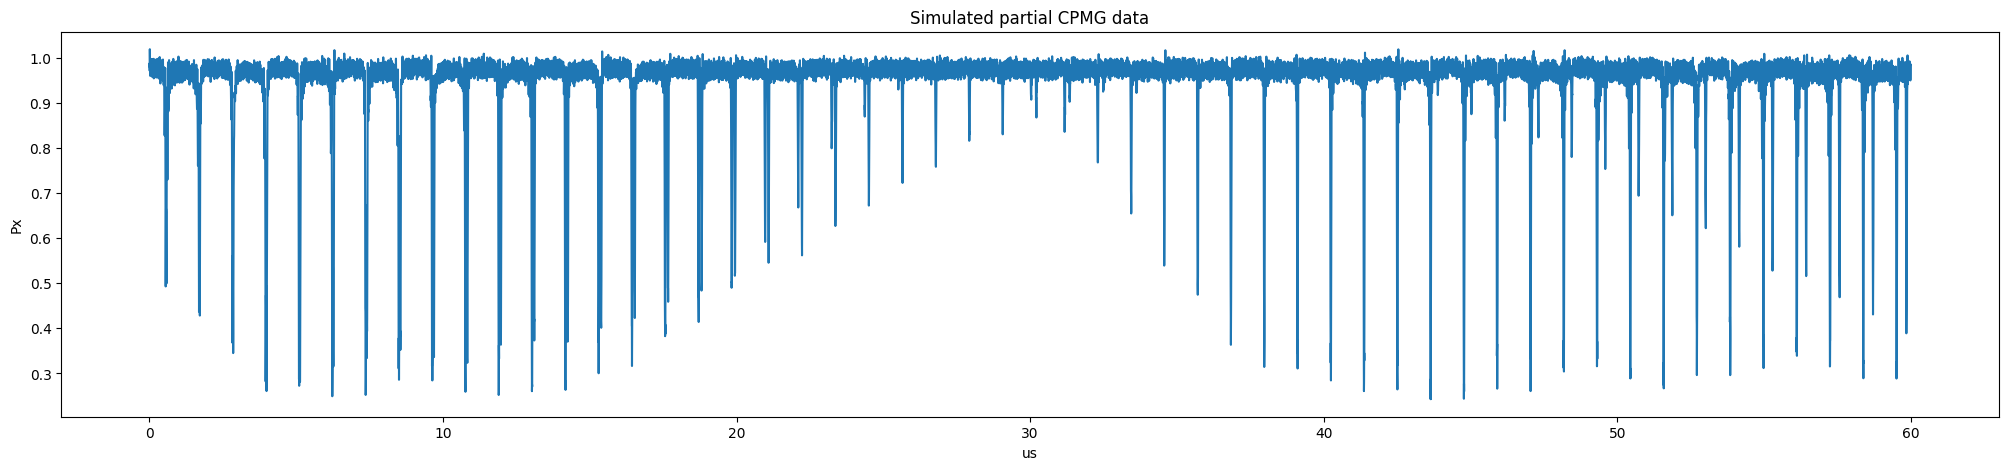

In [33]:
import matplotlib.pyplot as plt

plt.figure(facecolor='w', figsize=(25, 5))
plt.plot(time_data, exp_data)
plt.title('Simulated CPMG data')
plt.xlabel('us')
plt.ylabel('Px')

plt.figure(facecolor='w', figsize=(25, 5))
plt.title('Simulated partial CPMG data')
plt.plot(time_data, exp_data_deno)
plt.xlabel('us')
plt.ylabel('Px')